# Tasks

Solutions to the task assessment for Fundamentals of Data Analysis. Author is Noel Manley (G00387903@hotmail.com).

### Task1:

**October 5th, 2020:** Write a Python function called **counts** that takes a list as input and returns a dictionary of unique items in the list as keys and the number of times each item appears as values. So, the input ['A', 'A', 'B', 'C', 'A'] should have output {'A': 3, 'B': 1, 'C': 1}. Your code should not depend on any module from the standard library or otherwise.
****

#### Solution:
Count the occurence of one list item in a list using the count method as shown below. This method does not work for counting multiple items in a list [1]. If the count method was of all 3 unique items in the list A, B and C, only the count of the last item is produced as output.

In [1]:
# A list of strings
l = ['A', 'A', 'B', 'C', 'A']

# Count of each item in the list
l.count('A')
l.count('B')
l.count('C')

1

The simplest means of completing the task is by using the counter object from the collections module. The output from the method is displayed as a dictionary in a list of keys and counts of the list items as required by this task [2]. However the solution for the task should not be from a module of a standard Library. Need to build a function to complete this task but it is infomative to know the module and object to count the number of items into dictionary format.

In [2]:
# Import Counter object from the collections module
from collections import Counter

# A list of strings
l = ['A', 'A', 'B', 'C', 'A']
# Count the string objects in a dictionary
Counter(l)

Counter({'A': 3, 'B': 1, 'C': 1})

Dictionaries are Python’s implementation of a data structure that is more generally known as an associative array. A dictionary consists of a collection of key-value pairs. Each key-value pair maps the key to its associated value. A dictionary can be constructed using the dict() function.[3] In the example below i create a dictionary using the input for the task. The dict() function displays the dictionary in the key-value pair format which is required as the output.

In [3]:
# A list of strings
l = ['A', 'A', 'B', 'C', 'A']

# Create dictionary with the following inputs
dict(A = 3, B = 1, C = 1)

{'A': 3, 'B': 1, 'C': 1}

To complete the task i need to combine the results of the count built-in function which counts the the number of each item 
with the dict() built-in function and convert the output into a dictionary. This is all done 
within a For loop [4] to get a count of all the items within the input list. Reference [5] displays the code as follows. Firstly a count of all the items and dict() function displays the output in dictionary format.

In [125]:
# A list of strings
l = ['A', 'A', 'B', 'C', 'A']

dict((x,l.count(x)) for x in set(l))

{'C': 1, 'A': 3, 'B': 1}

Finally enclose the code in a function called counts [6]. Sort the dictionary by sorting the keys [7] so the output appears in alphabetical order as specified by the task.

In [5]:
# A list of strings
l = ['A', 'A', 'B', 'C', 'A']
# Define a function called counts
def counts(l):
    # Loop from 0 to the length of the list
    for i in range(0, len(l)):
        # Return dictionary
        return dict((x,l.count(x)) for x in sorted(set (l)))

In [6]:
# Run function
counts(l)

{'A': 3, 'B': 1, 'C': 1}

## References:
[1] - TutorialsPoint: Python List count() method; https://www.tutorialspoint.com/python/list_count.htm

[2] - PythonForBeginners: Python Collections Counter; https://www.pythonforbeginners.com/collection/python-collections-counter

[3] - Real Python: Dictionaries in Python; https://realpython.com/python-dicts/

[4] - w3schools.com: Python For Loops; https://www.w3schools.com/python/python_for_loops.asp

[5] - Stack Overflow: How can i count the occurences of a list item?; https://stackoverflow.com/questions/2600191/how-can-i-count-the-occurrences-of-a-list-item

[6] - A Whirlwind tour of python: Defining and using functions; https://jakevdp.github.io/WhirlwindTourOfPython/08-defining-functions.html

[7] - thispointer.com: Python : How to Sort a Dictionary by key or Value?; https://thispointer.com/python-how-to-sort-a-dictionary-by-key-or-value/

***

### Task2:

**November 2nd 2020:** Write a function called **dicerolls** that simulates rolling dice. Your function should take 2 parameters: the number of dice k and the number of times to roll the dice n. The function should simulate randomly rolling k dice n times. Keeping track of each total face value. It should then return a dictionary with the number of times each possible total face value occurred.
***

#### Solution:

The numpy.random function randint is used to simulate the rolling one dice. It can be used also to simulate multiple dice rolling concurrently also. If one dice is rolled using this function (as shown in the example below) you have an equal probability of getting each of the 6 sides. If the number of dice rolls was increased the histogram would be flatten but overall for each roll of the dice there is the same probability of any one of the 6 sides to appear.

(array([173., 167., 162., 157., 159., 182.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <BarContainer object of 6 artists>)

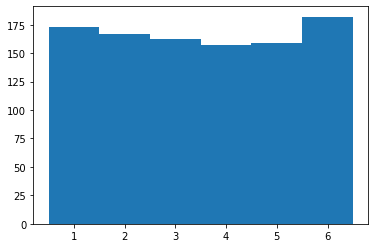

In [206]:
# import numpy and matplotlib libraries
import numpy as np
import matplotlib.pyplot as plt

# Use random.randint function
y = np.random.randint(1, 7, size = 1000)

# show histogram of output
plt.hist(y, bins = np.linspace(0.5, 6.5, 7))

If the number of dice was increased to 2 the minimum total face value would be 2 and the maximum face value would be 12 per roll. For a rolling dice simulation with 1000 rolls the distribution will be similar to a normal distribution [1] with the number of total face values clustered around the middle and less around the edges.

The random.randint function can be used for multiple dicerolls also. However random.choices function has been selected to display the simulation of multiple dice. Same as the randint function for one dice the probability of selecting any of the 6 faces is the same. A numpy array and a plt similar to randint example above would be created.
For multiple dice rolls the resulting distribution will be similar to a [1] normal distribution as the sum of each dice roll is calculated rather than one value returning the majority of the vlaues clustered around the mean while data less frequent is farther away from the mean. 
For the task solution the dicerolls function, the range method [2] is used within the random.choices method [3] to get the start and the end point of the range - the dice face value for one roll. within the choice method is the number of rolls specified in the function dicerolls (k = 1000).
The += operator [4] adds to the variable counter within the for loop until all 1000 rolls have been completed.

In [91]:
# import numpy library
import numpy as np
import matplotlib.pyplot as plt

# define the function dicerolls with 2 parameters k = no. of dice & n = no. of dice rolls
def dicerolls(k, n):
    # prepare dictionary with zero values for all possible results
    counter = {n : 0 for n in range(k, k*6 + 1)}

    # roll the dice
    for i in range(n):
        # sums all rolls of the dice
        total = sum(random.choices(range(1, 6 + 1), k = k))
        # adds result of each roll to counter
        counter[total] += 1
    return counter
# enter values for the no. of dice & no. of rolls (2 and 1000)
dicerolls(2, 1000)

{2: 29,
 3: 61,
 4: 89,
 5: 106,
 6: 137,
 7: 179,
 8: 146,
 9: 89,
 10: 82,
 11: 53,
 12: 29}

### References:
[1] - Dr. Soumen Atta: Simulating randomness using Python’s random module; https://soumenatta.medium.com/simulating-randomness-using-pythons-random-module-de9c08910c3c

[2] - GeekforGeeks: Python | range() method; https://www.geeksforgeeks.org/python-range-method/?ref=rp

[3] - w3schools.com: Python Random choices() Method; https://www.w3schools.com/python/ref_random_choices.asp

[4] - Programiz: Python Operators; https://www.programiz.com/python-programming/operators#:~:text=What%20are%20operators%20in%20python%3F%20Operators%20are%20special,and%205%20is%20the%20output%20of%20the%20operation.

***

### Task3:

The numpy.random.binomial function can be used to simulate flipping a coin with a 50/50 chance of heads or tails. Interestingly, if a coin is flipped many times then the number of heads is well approximated by a bell-shaped curve. For instance, if we flip a coin 100 times in a row the chance of
getting 50 heads is relatively high, the chances of getting 0 or 100 heads is relatively low, and the chances of getting any other number of heads decreases as you move away from 50 in either direction towards 0 or 100. Write some python code that simulates flipping a coin 100 times. Then run this code 1,000 times, keeping track of the number of heads in each of the 1,000 simulations. Select an appropriate plot to depict the resulting list of 1,000 numbers, showing that it roughly follows a bell-shaped curve.

***

#### Solution:

The coin toss has been used for centuries to determine random outcomes. The reason it is so useful is there are only 2 possible outcomes "heads" or "tails". It can be used to settle a dispute, in sports involving 2 teams like GAA, Soccer and Rugby it is used to see what direction a team starts. The appeal of the coin toss is that it is simple, fair method of deciding between 2 options and the outcome of the coin toss should have even odds. 
There are some publications however such as [1] and [2] who dispute that the outcome of a coin toss is 50:50. The NCBI performed an experiment among Vancouver residents in Canada. The main outcome was the proportion of “heads” coin tosses achieved (out of 300 attempts) by each participant. Each of the participants attempted to flip the coin so as to achieve a heads result. The result was all 13 who took part achieved a result of more heads than tails. The analysis of the experiment suggested that the person who tosses the coin can manipulate the result in order to get their desired result. Fortunately like this simulation below using the normal.binomial distribution all coin tosses into the sporting sphere are carried out by a neutral or referee to ensure there is a even and fair result.

#### Binomial Distribution

A binomial ditribution is used to determine whether the probability of an experiment is a success or failure and this experiment is repeated on multiple occasions. Binomial as the name suggests has two possible outcomes and therefore is the ideal distribution to simulate the toss of a coin where the outcome is either heads or tails. Other uses of the binomial distribution is to determine relief from allergies, the probability of dying after a heart attack and the medical devices such as the coronary stent can be successful or not [3].
The formula of the binomial distribution in its simplest form - numpy.random.binomial(n,p, size=none) where p is the probability of success of a single trial and n is the number of trials.

In the example below the numpy library is imported. The random.binomial distribution from the numpy library performs a coin toss and returns a 0 or a 1. The coin toss simulator is run only once as the number of trials specified in the code is 1. It is a fair coin toss as probability parameter is 0.5. I have used an if else statement [4] to identify the coin toss as either heads or tails. If the expression in the if statement is a 1 or a success value then the result of the coin toss is heads and the else statement returns a tails value if the expression returns a 0 or a false value. For each fair coin toss it is expected that half the time the result will be heads and half the time tails.

In [20]:
# import numpy library
import numpy as np
# no of coin toss is 1 and probability is 0.5
if np.random.binomial(1, .5) == 1: 
    print ("heads")
else: print("tails")

tails


If two coins are tossed using the same probability there will be 2 results for each individual coin toss but for the combination of the two coin tosses there are four different possibilities: two heads, a head and a tail, a tail and a head and two tails [5]. The most common outcome from tossing 2 coins is a head and a tail, 50% of the time. Similarily for 3 coin tosses there are 8 possible outcomes. Each of the eight possibilities are equally likely so each have a probability of 0.125 [6]. 4 coin tosses have 16 different combinations. The simplest way to calculate the number of combinations is by factorial of the number of times the coin is been tossed 4! or 2 x 2 x 2 x 2.
In the example below a function called cointoss is created to find how many heads are observed if a coin is tossed 100 times. The expected result from a fair coin toss will be close to 50% of the number of coin tosses. Furthermore the likelihood of getting 0 or 100 heads are highly unlikely with the results expected to be close clustered around the mean of 50.

In [196]:
# import numpy library
import numpy as np
# define function cointoss
def cointoss():
    # assign values to no of trials and probability
    n=100
    p=.5
    # for loop to loop through the 100 coin tosses
    for i in range(0, n):
        x = np.random.binomial(n, p)
        x+=1
    return x
# run function to get outcome (no. of heads)
cointoss()

54

#### Bell-Shaped Curve

If 4 coins are flipped the extremes of no heads and all heads are beginning to disappear. As the number of coins flipped increase the probability is clustered around the central average and the the extremes of getting all heads or no heads have disappeared. The plot of the array that's produced is called a bell-shaped curve as it appears like the shape of a bell [7]. The shape of the bell shaped curve is determined by the mean and the standard deviation. The standard deviation is the distance that measurements spread out from the mean.

#### Experiment

The following python code simulates flipping a coin 100 times (n). This code is run 1,000 times (size), to display in an array the number of heads in each of the 1,000 simulations[8],[9]. As can be seen from the array the outcome of each experiment is close to the expected result of 50 heads.

In [180]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
# assign values to no. of trials and probability
n=100
p=0.5
# repeat the experiment 1000 times
size=1000
# binomial methos to flip the coin
x=np.random.binomial(n, p, size)
# print the results of the 1000 experiments in an array
print("Results of 1,000 experiments -",x)

Results of 1,000 experiments - [49 52 44 42 58 52 51 56 48 52 49 47 48 43 59 55 48 43 49 51 46 59 50 48
 55 57 51 46 43 55 43 55 56 40 56 53 46 45 50 45 52 51 54 54 59 56 40 55
 51 46 56 49 62 49 43 55 49 49 48 52 45 54 46 51 44 65 55 49 45 44 53 41
 50 45 48 46 49 52 50 49 53 48 55 59 42 50 59 52 58 48 60 46 48 41 54 41
 56 47 50 50 57 48 55 49 46 44 56 58 42 56 51 59 56 50 49 51 42 50 52 49
 52 46 46 60 52 42 61 59 53 52 46 49 58 57 46 54 50 49 39 44 48 57 48 60
 53 48 46 51 56 46 49 46 44 52 43 54 56 50 48 46 50 47 61 48 46 42 43 47
 60 48 59 54 42 47 49 51 59 59 51 50 48 55 44 58 57 60 49 46 39 52 52 52
 52 54 52 41 45 43 43 50 51 47 50 53 51 53 48 51 44 49 41 49 52 53 49 48
 45 52 48 51 45 47 57 52 48 48 51 53 51 46 47 49 49 57 48 60 47 55 52 44
 47 50 49 45 55 43 49 49 49 46 64 45 46 52 46 49 50 55 42 47 53 44 46 41
 50 48 46 49 45 49 56 48 52 46 47 48 43 60 52 52 59 58 45 40 48 56 53 54
 50 51 45 45 49 43 45 46 52 47 46 55 45 53 51 41 55 49 49 49 49 56 50 57
 48 50 54 48 50 57 5

Count the number of heads for each of the 1,000 experiments. Plot the number of successes (heads) on a line plot. The resulting plot is a bell shaped curve as shown below where the probability of seeing 50 heads is the highest (mean) and the standard deviation is a distance of 31 ranging from 36 to 67 heads.

TypeError: 'str' object is not callable

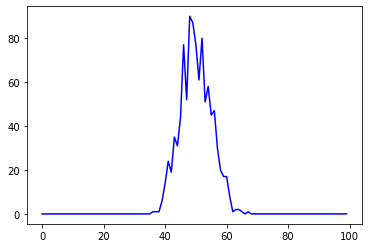

In [195]:
bc=[np.equal(x,i).sum() for i in range(n)]
plt.plot(list(range(n)), bc, color='blue')
plt.xlabel('No of Heads')
plt.ylabel('Probability')

## References

[1]-WIRED: Cheat With Science: Win a Coin Toss; https://www.wired.com/2010/11/st-cheatscience-cointoss/

[2]-NCBI: How random is the toss of a coin?; https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2789164/

[3]-Sphweb: The Binomial Distribution: A Probability Model for a Discrete Outcome; https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_probability/bs704_probability7.html

[4]-tutorials point: Python IF...ELIF...ELSE Statements; https://www.tutorialspoint.com/python/python_if_else.htm

[5]-Sumproduct.com: Simulation Stimulation; https://www.sumproduct.com/thought/simulation-stimulation

[6]-pi3: Week 9: Tossing a Coin and the Bell Curve; http://pi3.sites.sheffield.ac.uk/tutorials/week-9

[7]-Open.lib: The Binomial Distribution and the Bell Curve; https://open.lib.umn.edu/app/uploads/sites/218/2018/08/Bell-Curve-script.pdf

[8]-cmdlinetips: Simulating Coin Toss Experiment in Python with NumPy; https://cmdlinetips.com/2018/12/simulating-coin-toss-experiment-with-binomial-random-numbers-using-numpy/

[9]-towards datascience: How To Code A Fair Coin Flip In Python — Regina Of Tech; https://towardsdatascience.com/how-to-code-a-fair-coin-flip-in-python-d54312f33da9

[10]-Includehelp.com: Python | Binomial Experiment Simulation; https://www.includehelp.com/python/binomial-experiment-simulation.aspx

***